# Семинар 3. Линейная регрессия

Подключение библиотек. 
$
\newcommand{\R}{\mathbb{R}}
\newcommand{\X}{\mathbb{X}}
\newcommand{\norm}[1]{\lVert #1 \rVert}
\newcommand{\abs}[1]{\left| #1 \right|}
\newcommand{\E}{\mathbb{E}}
\newcommand{\D}{\mathbb{D}}
\renewcommand{\Prob}{\mathbb{P}}
\renewcommand{\le}{\leqslant}
\renewcommand{\ge}{\geqslant}
$

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as wg

plt.style.use('ggplot')

# 1. Линейная регрессия из библиотеки sklearn

Для демонстрации воспользуемся датасетом __вес-рост__ ([ссылка](https://www.kaggle.com/mustafaali96/weight-height)):
* 10000 наблюдений, 5000 мужчин и 5000 женщин. Признаки:
    * Рост в дюймах.
    * Вес в фунтах.
    * Пол (Male/ Female).

In [3]:
# прочитать файл weight-height.csv
df = pd.read_csv('weight-height.csv')

print('Число наблюдений:', df.shape[0])
df.head()

Число наблюдений: 10000


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


__Задача 1:__ Переведем вес и рост в привычные единицы измерения по формулам:
* 1 фунт = 0.453592 кг.
* 1 дюйм = 2.54 см.

In [5]:
# перевести в кг и см
df['Height_sm'] = df.Height * 2.54
df['Weight_kg'] = df.Weight * 0.453592

In [6]:
df.mean()

Height        66.367560
Weight       161.440357
Height_sm    168.573602
Weight_kg     73.228054
dtype: float64

Совместное распределение данных:

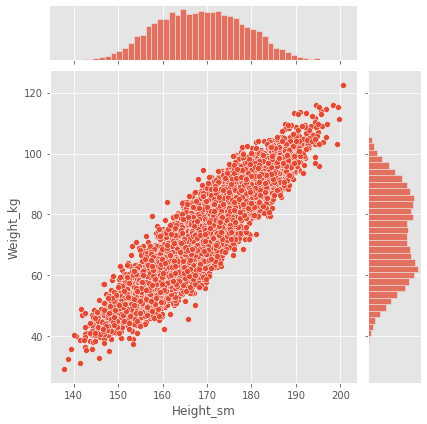

In [7]:
# график совместного распределения
sns.jointplot(data=df, x='Height_sm', y='Weight_kg')

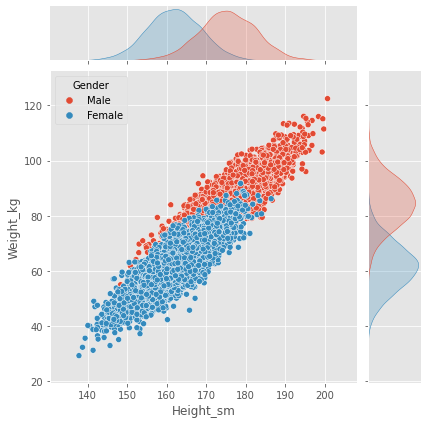

In [8]:
sns.jointplot(data=df, x='Height_sm', y='Weight_kg', hue='Gender')

In [11]:
# приготовить X и y
X = df[['Height_sm']].values
y = df['Weight_kg'].values

print('X:', X.shape)
print('y:', y.shape)

X: (10000, 1)
y: (10000,)


## Классическая линейная регрессия

Пусть объект описывается $d$ признаками $(x_1, \ldots, x_d)$ и нужно предсказать ответ $y$.

__Линейная регрессия:__ $$ \hat{y} \sim \theta_0 + \sum\limits_{k=1}^d \theta_k x_k, $$

* $\hat{y}$ -- прогнозное значение.
* $x_k, k=\overline{1,n}$ -- значения признаков объекта.
* $\theta_k, k=\overline{1,n}$ -- параметры модели.

Векторная запись: $$\hat{y} = x^T \theta. $$

__Примечание:__ В этой записи считаем, что $x_0 = 1$.

### Обучение: 
Пусть имеется матрица признаков $X \in \R^{n x d}$ и вектор ответов $Y \in \R^n$. 

__Метод наименьших квадратов:__ $$Q(\theta) = ||Y - X\theta||^2 = \sum\limits_{k=1}^n (Y_k - X_k^T \theta)^2 \to \min\limits_\theta.$$

Оптимизация:
* Аналитическое решение: $$\hat{\theta} = (X^T X)^{-1} X^T Y.$$
* Итерационные методы: 
    * _градиентный спуск (GD):_ $$\theta^{(k+1)} = \theta^{(k)} - \alpha \cdot \nabla Q(\theta^{(k)}).$$
    * _стохастический градиентный спуск (SGD):_ $$\theta^{(k+1)} = \theta^{(k)} - \alpha \cdot \nabla_i Q(\theta^{(k)}), $$ где градиент берется $\nabla_i$ берется по наблюдению со случайным индексом $i$.
    * _mini-batch стохастический градиентный спуск (Mini-batch SGD)._

In [12]:
# обучим линейную модель
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
model

LinearRegression()

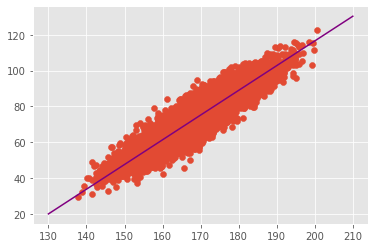

In [13]:
x_plt = np.linspace(130, 210, 1024)

model_pred = model.predict(x_plt.reshape(-1, 1))

plt.scatter(data=df, x='Height_sm', y='Weight_kg')
plt.plot(x_plt, model_pred, color='purple')
plt.show()

# 2. Работа с категориальными признаками.

Заметим, что в наших данных имеется категориальный признак _Gender_.

In [17]:
df.Gender.value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

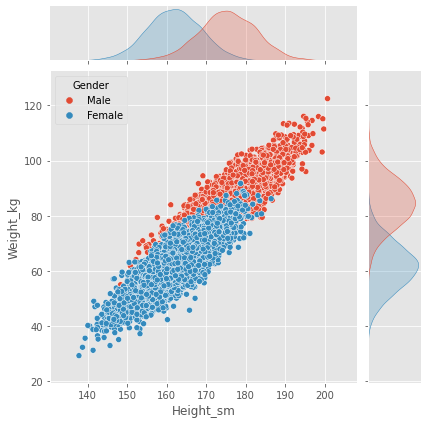

In [18]:
sns.jointplot(data=df, x='Height_sm', y='Weight_kg', hue='Gender')

__Задача:__ Занумеруем и превратим текстовые признаки в числовые значения:

In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df.Gender)

encoder.transform(df.Gender)

array([1, 1, 1, ..., 0, 0, 0])

In [23]:
encoder = LabelEncoder()
encoder.fit(['car', 'bike', 'ship', 'chair'])
encoder.classes_

array(['bike', 'car', 'chair', 'ship'], dtype='<U5')

In [24]:
encoder.transform(['car', 'car', 'bike', 'ship', 'ship'])

array([1, 1, 0, 3, 3])

In [31]:
from sklearn.preprocessing import OneHotEncoder

codes = np.array(['car', 'car', 'bike', 'ship', 'ship']).reshape(-1, 1)
onehot = OneHotEncoder(sparse=False, drop='first')
onehot.fit(codes)
onehot.transform(codes)

array([[1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.]])

In [34]:
df['Gender_code'] = df.Gender.map({'Female': 0, 'Male': 1})
df.Gender_code.value_counts()

1    5000
0    5000
Name: Gender_code, dtype: int64

__Задача:__ Обученить линейную модель с двумя признаками.

In [37]:
X = df[['Height_sm', 'Gender_code']].values
y = df['Weight_kg'].values

print(X.shape, y.shape)

(10000, 2) (10000,)


In [38]:
model = LinearRegression()
model.fit(X, y)
model

LinearRegression()

In [42]:
x_plt = np.linspace(130, 210, 1024)

X1 = np.column_stack([x_plt, np.zeros_like(x_plt)])
X2 = np.column_stack([x_plt, np.ones_like(x_plt)])

print(X1[:5])
print(X2[:5])

[[130.           0.        ]
 [130.07820137   0.        ]
 [130.15640274   0.        ]
 [130.23460411   0.        ]
 [130.31280547   0.        ]]
[[130.           1.        ]
 [130.07820137   1.        ]
 [130.15640274   1.        ]
 [130.23460411   1.        ]
 [130.31280547   1.        ]]


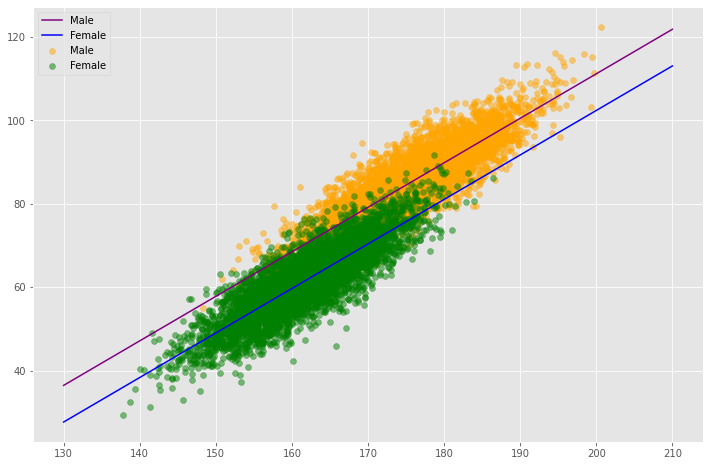

In [44]:
male_pred = model.predict(X2)
female_pred = model.predict(X1)

plt.figure(figsize=(12, 8))
plt.scatter(data=df[df.Gender_code==1], x='Height_sm', y='Weight_kg', color='orange', alpha=0.5, label='Male')
plt.scatter(data=df[df.Gender_code==0], x='Height_sm', y='Weight_kg', color='green', alpha=0.5, label='Female')

plt.plot(x_plt, male_pred, color='purple', label='Male')
plt.plot(x_plt, female_pred, color='blue', label='Female')
plt.legend()
plt.show()

### Интерпретация модели

In [45]:
print('Коэффициенты:', model.coef_)

Коэффициенты: [1.06735934 8.78957447]


In [46]:
print('Theta_0:', model.intercept_)

Theta_0: -111.09534135536911


__Упражнение:__ Добавить в модель переменную `Gender_Code * Height_sm`. Дать интерпретацию, выписать формулы.

In [49]:
features = np.array([[192, 1]])
print(features.shape)

model.predict(features)

(1, 2)


array([102.62722653])

In [47]:
# демонстрация
out = wg.Output()

def demo(height, gender):
    gender = 1 if gender == 'Male' else 0
    with out:
        out.clear_output(wait=True)
        pred = model.predict([[height, gender]])
        print('Прогноз Вашего веса при заданных параметрах:', pred)
    return

wg.interact(demo,
    height=wg.FloatSlider(min=120, max=220, value=170, step=1),
    gender=wg.SelectionSlider(options=['Male', 'Female'], value='Male'),
    continuous_update=True
)
display(out)

interactive(children=(FloatSlider(value=170.0, description='height', max=220.0, min=120.0, step=1.0), Selectio…

Output()

# 3. Нелинейная линейная регрессия

Как добавить нелинейности в линейную модель?

In [138]:
# задать функцию func = sin x
def func(x):
    return np.sin(x)

In [145]:
# сгенерируем выборку с шумом из функции sin x

x_low, x_high = -np.pi, np.pi

N = 32
X = np.linspace(x_low, x_high, N)
y = func(X) + np.random.normal(0, 0.2, N)

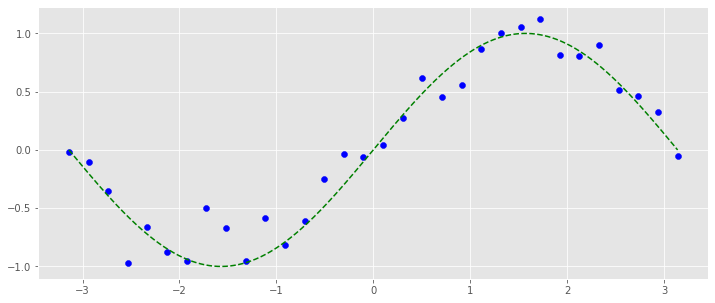

In [146]:
x_plt = np.linspace(x_low, x_high, 1024)
y_plt = func(x_plt)

plt.figure(0, figsize=(12, 5))
plt.scatter(X, y, color='blue')
plt.plot(x_plt, y_plt, linestyle='--', color='green')
plt.show()

__Полиномиальная регрессия:__ $$ y \sim \theta_0 + \sum\limits_{k=1}^p \theta_k x^k.$$

__Задача:__ По входному вектору $x$ выдать матрицу, где в столбцах стоят степени $x$: $$ x \to (x, x^2, \ldots, x^p).$$

In [147]:
P = 5

In [148]:
# круто, но сложно
Xp = np.power(X.reshape(-1, 1), np.arange(1, P + 1).reshape(1, -1))

In [149]:
def polynom(x, p):
    powers = []
    for k in range(1, p+1):
        powers.append(x ** k)
    return np.column_stack(powers)

In [150]:
Xp = polynom(X, P)
Xp.shape

(32, 5)

### Работа с числовыми признаками

Преобразования числовых признаков:
* нормализация: $$\tilde{x}_k = \frac{x_k - \E x_k}{\sqrt{\D x_k}}.$$
* минмакс-преобразование: $$\tilde{x}_k = \frac{x_k - \min{x_k}}{\max{x_k} - \min{x_k}}.$$

In [151]:
print(Xp.mean(axis=0))
print(Xp.std(axis=0))

[2.77555756e-17 3.50211769e+00 1.11022302e-16 2.20479172e+01
 5.32907052e-15]
[  1.87139458   3.12779297  12.84633826  29.27752571 107.17754948]


In [152]:
# нормализация признаков
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Xp)

Xps = scaler.transform(Xp)

In [153]:
# новые средние
print(np.isclose(Xps.mean(axis=0), 0))
print(Xps.std(axis=0))

[ True  True  True  True  True]
[1. 1. 1. 1. 1.]


## Пример: полиномиальная регрессия

In [154]:
# учим модель
model = LinearRegression()
model.fit(Xps, y)
model

LinearRegression()

In [161]:
# предсказываем новые данные

x_new = np.linspace(x_low, x_high, 1024)
# x_new = np.linspace(0.2, 7, 1024)

x_new.shape

(1024,)

In [162]:
X_new = polynom(x_new, P)
X_new.shape

(1024, 5)

In [163]:
print(X_new.mean(axis=0))
print(X_new.std(axis=0))

X_new = scaler.transform(X_new)

print(X_new.mean(axis=0))
print(X_new.std(axis=0))

[ 2.29850861e-16  3.29629994e+00  7.28583860e-17  1.95580430e+01
 -4.60742555e-15]
[ 1.81557152  2.94829608 11.75363276 26.0772871  92.71944832]
[ 4.11996826e-18 -6.58028694e-02  4.51028104e-17 -8.50438718e-02
 -1.09287579e-16]
[0.97017034 0.94261228 0.91494031 0.890693   0.8651014 ]


In [164]:
y_new = model.predict(X_new)
y_new[:5]

array([ 0.00727134, -0.00077484, -0.00878354, -0.01675475, -0.02468843])

In [165]:
y_old = model.predict(Xps)

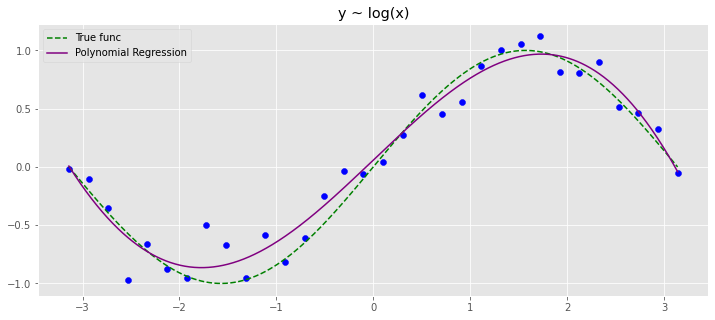

In [166]:
plt.figure(0, figsize=(12, 5))
plt.scatter(X, y, color='blue')
plt.plot(x_new, func(x_new), color='green', linestyle='--', label='True func')
plt.plot(x_new, y_new, color='purple', label='Polynomial Regression')
plt.legend()
plt.title('y ~ log(x)')
plt.show()

# Демонстрация переобучения

In [167]:
N = 32

X = np.linspace(x_low, x_high, N)
y = func(X) + np.random.normal(0, 0.2, size=N)

In [170]:
from sklearn.linear_model import Ridge

In [180]:
out = wg.Output()

def demo(p, fix_ylim):
    Xp = polynom(X, p)
    
    # scaler
    scaler = StandardScaler().fit(Xp)    
    Xps = scaler.transform(Xp)
    
    # model
    model = LinearRegression() #
#     model = Ridge(alpha=1)
    model.fit(Xps, y)
    
    # prediction
    x_new = np.linspace(x_low, x_high, 1024)

    X_new = polynom(x_new, p)
    X_new = scaler.transform(X_new)
    y_new = model.predict(X_new)
    
    with out:
        out.clear_output(wait=True)
        plt.figure(0, figsize=(12, 5))
        plt.scatter(X, y, color='blue')
        plt.plot(x_new, func(x_new), color='green', linestyle='--', label='True func')
        plt.plot(x_new, y_new, color='purple', label=f'p={p}')
        plt.legend()
        plt.title('y ~ log(x)')
        if fix_ylim:
            plt.ylim(-2, 3)
        plt.show()
        print(model.coef_)
        print(model.intercept_)
    
wg.interact(demo,
    p=wg.IntSlider(min=1, max=X.shape[0] + 20, value=1),
    fix_ylim=wg.Checkbox(description='Fix ylim', value=False),
    continuous_update=True
)
display(out)

interactive(children=(IntSlider(value=1, description='p', max=52, min=1), Checkbox(value=False, description='F…

Output()